In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import plotly.express as px

## Analiza trójwymiarowego oscylatora harmonicznego

WWW: [https://en.wikipedia.org/wiki/Harmonic_oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator)

Trójwymiarowy oscylator harmoniczny jest rozszerzeniem modelu jednowymiarowego, pozwalającym na badanie oscylacji w trzech niezależnych kierunkach przestrzennych. Jest to istotne dla zrozumienia wielu fizycznych systemów, od atomów w kryształach po pułapki magnetyczne używane w fizyce kwantowej.

### Siły działające

Dla trójwymiarowego oscylatora harmonicznego siły przywracające działają niezależnie wzdłuż osi \(x\), \(y\) i \(z\), co można zapisać jako:

$$
\vec{F} = -k\vec{r} = -k\begin{bmatrix} x \\ y \\ z \end{bmatrix}
$$

gdzie:
- \(k\) jest stałą sprężystości (założono jednakową dla wszystkich kierunków),
- \(\vec{r}\) jest wektorem położenia ciała względem położenia równowagi.

### Równania ruchu

Równanie ruchu dla trójwymiarowego oscylatora harmonicznego można zapisać, stosując drugie prawo Newtona, jako:

$$
m\frac{d^2\vec{r}}{dt^2} = -k\vec{r}
$$

Rozkładając to na komponenty, otrzymujemy system trzech równań różniczkowych drugiego rzędu:

$$
m\frac{d^2x}{dt^2} = -kx, \quad m\frac{d^2y}{dt^2} = -ky, \quad m\frac{d^2z}{dt^2} = -kz
$$

#### Rozwiązania równań ruchu

Rozwiązania powyższych równań można przedstawić jako funkcje czasu dla każdej z osi:

$$
x(t) = A_x\cos(\omega t + \phi_x), \quad y(t) = A_y\cos(\omega t + \phi_y), \quad z(t) = A_z\cos(\omega t + \phi_z)
$$

gdzie:
- \(A_x\), \(A_y\), \(A_z\) są amplitudami oscylacji wzdłuż odpowiednich osi,
- \(\omega = \sqrt{\frac{k}{m}}\) jest wspólną częstością kątową oscylacji dla wszystkich kierunków,
- \(\phi_x\), \(\phi_y\), \(\phi_z\) są fazami początkowymi oscylacji wzdłuż odpowiednich osi.

### Wnioski

Model trójwymiarowego oscylatora harmonicznego dostarcza kompleksowego opisu zachowania oscylacyjnego w przestrzeni trójwymiarowej, uwzględniając niezależność ruchu w każdym z kierunków. Jest to fundament dla zaawansowanych modeli w fizyce teoretycznej i stosowanej, wskazujący na uniwersalność i znaczenie oscylacji harmonicznych w naturze.


In [2]:
from Newton_solver import NewtonSolverIVP3D

def simple_harmonic_oscillator(t, position, velocity):
    kx = 1.0  # Spring constant
    ky = 4.0  # Spring constant
    kz = 9.0  # Spring constant
    
    return [-kx * position[0], -ky * position[1], -kz * position[2]]

# Create a NewtonSolver object for a 3D simple harmonic oscillator
solver = NewtonSolverIVP3D()
solver.add_force(simple_harmonic_oscillator)  # Add the force function
solver.set_initial_conditions([0.0, 0.0, 0.0], [1.0, 1.0, 1.0])  # Set initial conditions
solver.set_mass(1.0)  # Set
t, position, velocity = solver.solve_motion([0, 20], time_step=0.01)

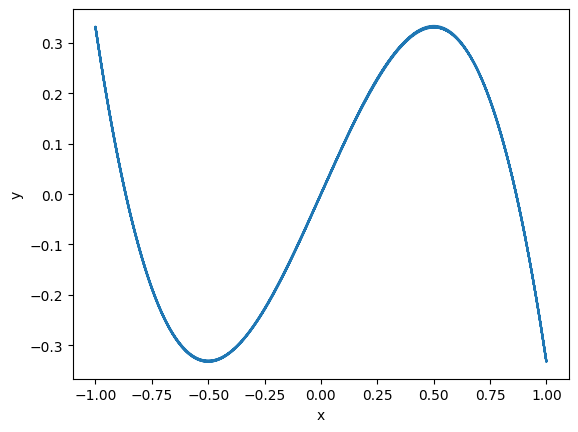

In [3]:
# plot 2D x,y projection
    # Plot 2D case
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(position[0], position[2])
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [4]:
import plotly.graph_objs as go
from IPython.display import display

# Zakładam, że `t`, `position`, i `velocity` są już obliczone przez Twojego solvera
# Tutaj generujemy wykres

fig = go.Figure()

# Dodajemy trajektorię dla każdej osi
fig.add_trace(go.Scatter3d(x=position[0], y=position[1], z=position[2],
                           mode='lines', name='Trajektoria',line=dict(color='red', width=4))      )

# Ustawienia wykresu
fig.update_layout(title='Trajektoria Harmonicznego Oscylatora Prostego',
                  scene=dict(xaxis_title='X Axis',
                             yaxis_title='Y Axis',
                             zaxis_title='Z Axis'),
                  autosize=False, width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))

# Wyświetlenie wykresu
display(fig)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive


def plot_trajektoria(time_index):
    # Funkcja rysująca wykres w danym punkcie czasowym
    plt.figure(figsize=(10, 6))
    plt.plot(position[0][:time_index], position[1][:time_index], label='Trajektoria')
    
    plt.xlabel('Czas')
    plt.ylabel('Pozycja')
    plt.title('Trajektoria Harmonicznego Oscylatora Prostego')
    plt.legend()
    plt.show()

# Interaktywny suwak
interactive_plot = interactive(plot_trajektoria, time_index=(0, len(t)-1))
output = interactive_plot.children[-1]
interactive_plot


interactive(children=(IntSlider(value=999, description='time_index', max=1999), Output()), _dom_classes=('widg…

In [6]:
# sprężyna w polu grawitacyjnym
from Newton_solver import NewtonSolverIVP3D

def simple_harmonic_oscillator(t, position, velocity):
    k=1
    m = 1.0  # Mass of the object
    
    return [-k * position[0]-velocity[0]/10, -k * position[1]-velocity[1]/10, -k * position[2]- 9.81*m-velocity[2]/10]

# Create a NewtonSolver object for a 3D simple harmonic oscillator
solver = NewtonSolverIVP3D()
solver.add_force(simple_harmonic_oscillator)  # Add the force function
solver.set_initial_conditions([0.0, 0.0, 0.0], [1.0, 1.0, 0.0])  # Set initial conditions
solver.set_mass(1.0)  # Set
t, position, velocity = solver.solve_motion([0, 20], time_step=0.01)

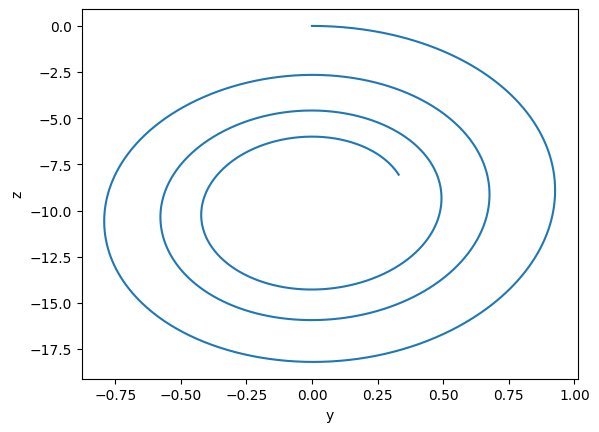

In [7]:
# plot 2D x,z projection
    # Plot 2D case
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(position[0], position[2])
ax.set_xlabel('y')
ax.set_ylabel('z')
plt.show()


In [8]:
import plotly.graph_objs as go
from IPython.display import display

# Zakładam, że `t`, `position`, i `velocity` są już obliczone przez Twojego solvera
# Tutaj generujemy wykres

fig = go.Figure()

# Dodajemy trajektorię dla każdej osi
fig.add_trace(go.Scatter3d(x=position[0], y=position[1], z=position[2],
                           mode='lines', name='Trajektoria',line=dict(color='red', width=4))      )

# Ustawienia wykresu
fig.update_layout(title='Trajektoria Harmonicznego Oscylatora Prostego',
                  scene=dict(xaxis_title='X Axis',
                             yaxis_title='Y Axis',
                             zaxis_title='Z Axis'),
                  autosize=False, width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90))

# Wyświetlenie wykresu
display(fig)